In [1]:
import pandas as pd
import splinter
import requests

In [2]:
import matplotlib.pyplot as plt

In [64]:
readCSV_df = pd.read_csv("PotusParty.csv")

In [18]:
readCSV_df

,JusticeName,StateAppointedFrom,AppointedByPresident,PoliticalParty,OathTakenOn,DateServiceTerminated,YearIN,YearOUT
0,"Jay, John",New York,Washington,Federalist Party,"October 19, 1789","June 29, 1795",1789,1795
1,"Rutledge, John",South Carolina,Washington,Federalist Party,"August 12, 1795","December 15, 1795",1795,1795
2,"Ellsworth, Oliver",Connecticut,Washington,Federalist Party,"March 8, 1796","December 15, 1800",1796,1800
3,"Marshall, John",Virginia,"Adams, John",Federalist Party,"February 4, 1801","July 6, 1835",1801,1835
4,"Taney, Roger Brooke",Maryland,Jackson,Democratic Party,"March 28, 1836","October 12, 1864",1836,1864
...,...,...,...,...,...,...,...,...
114,"Alito, Samuel A., Jr.",New Jersey,"Bush, G. W.",Republican Party,"January 31, 2006","July 23, 2020",2006,2020
115,"Sotomayor, Sonia",New York,Obama,Democratic Party,"August 8, 2009","July 23, 2020",2009,2020
116,"Kagan, Elena",Massachusetts,Obama,Democratic Party,"August 7, 2010","July 23, 2020",2010,2020
117,"Gorsuch, Neil M.",Colorado,Trump,Republican Party,"April 10, 2017","July 23, 2020",2017,2020


In [5]:
#POTUS_league_df.to_csv("PotusParty.csv", index=False)

#grouped = df.groupby('mygroups').sum().reset_index()
#grouped.sort_values('mygroups', ascending=False)

### Count of Judges Appointed By The Supreme Court by each President

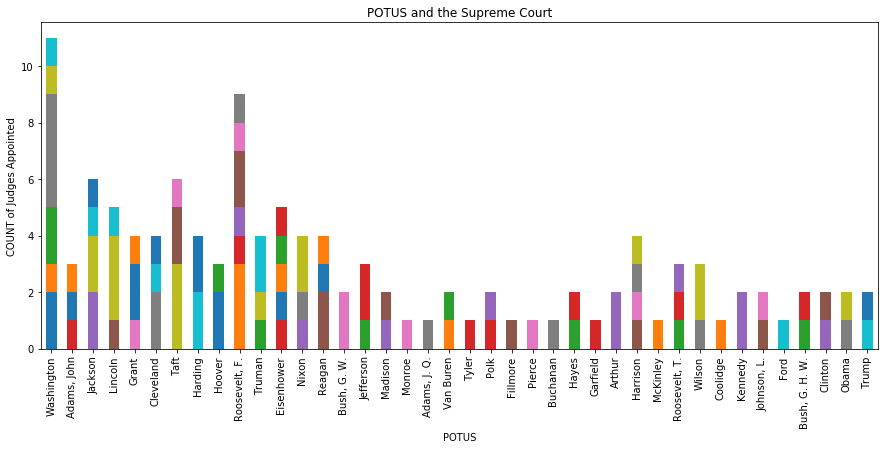

In [22]:
Years_df = readCSV_df.groupby(['AppointedByPresident', 'YearIN'], sort=False)['JusticeName'].count()
#Years_df = Years_df.sort_values(['YearIN'])


Years_df.unstack().plot(kind='bar', figsize=(15, 6), stacked=True, legend=False)
#plt.gca().invert_yaxis()
plt.title("POTUS and the Supreme Court")
plt.xlabel("POTUS")
plt.ylabel("COUNT of Judges Appointed")

#plt.show()
plt.savefig("CountByPotus.png")

In [23]:
POTUS_league_df = readCSV_df

In [65]:
# https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
# do same but attach it to the dataframe
# df['c'] = df.apply(lambda row: row.a + row.b, axis=1)

readCSV_df["YearsServed"] = readCSV_df.apply(lambda row: row.YearOUT - row.YearIN, axis=1)


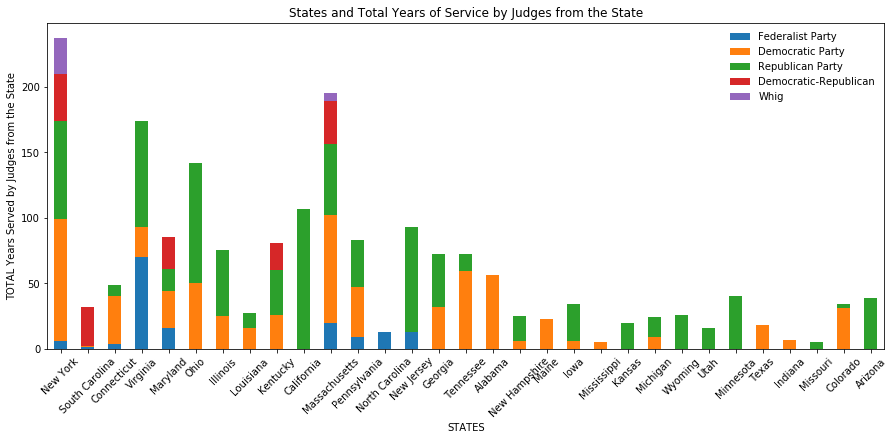

In [66]:
Years_df = readCSV_df.groupby(['StateAppointedFrom', 'PoliticalParty'], sort=False)['YearsServed'].sum().sort_values(ascending=True)


Years_df.unstack().plot(kind='bar', figsize=(15, 6), rot=45, stacked=True)
#plt.gca().invert_yaxis()
plt.title("States and Total Years of Service by Judges from the State")
plt.xlabel("STATES")
plt.ylabel("TOTAL Years Served by Judges from the State")
#plt.show()
plt.legend(loc='upper right', frameon=False)

plt.savefig("TotalYears.png")

In [110]:
Years_df

StateAppointedFrom  PoliticalParty  
California          Republican Party    107
New York            Democratic Party     93
Ohio                Republican Party     92
Massachusetts       Democratic Party     82
Virginia            Republican Party     81
                                       ... 
Mississippi         Democratic Party      5
Connecticut         Federalist Party      4
Colorado            Republican Party      3
South Carolina      Democratic Party      1
                    Federalist Party      1
Name: YearsServed, Length: 62, dtype: int64

In [31]:
readCSV_df

,JusticeName,StateAppointedFrom,AppointedByPresident,PoliticalParty,OathTakenOn,DateServiceTerminated,YearIN,YearOUT,YearsServed
0,"Jay, John",New York,Washington,Federalist Party,"October 19, 1789","June 29, 1795",1789,1795,6
1,"Rutledge, John",South Carolina,Washington,Federalist Party,"August 12, 1795","December 15, 1795",1795,1795,0
2,"Ellsworth, Oliver",Connecticut,Washington,Federalist Party,"March 8, 1796","December 15, 1800",1796,1800,4
3,"Marshall, John",Virginia,"Adams, John",Federalist Party,"February 4, 1801","July 6, 1835",1801,1835,34
4,"Taney, Roger Brooke",Maryland,Jackson,Democratic Party,"March 28, 1836","October 12, 1864",1836,1864,28
...,...,...,...,...,...,...,...,...,...
114,"Alito, Samuel A., Jr.",New Jersey,"Bush, G. W.",Republican Party,"January 31, 2006","July 23, 2020",2006,2020,14
115,"Sotomayor, Sonia",New York,Obama,Democratic Party,"August 8, 2009","July 23, 2020",2009,2020,11
116,"Kagan, Elena",Massachusetts,Obama,Democratic Party,"August 7, 2010","July 23, 2020",2010,2020,10
117,"Gorsuch, Neil M.",Colorado,Trump,Republican Party,"April 10, 2017","July 23, 2020",2017,2020,3


In [32]:
#df.sort_values(by=['col1', 'col2'])
sorted_df = readCSV_df.sort_values(by=['YearIN', 'YearOUT'])

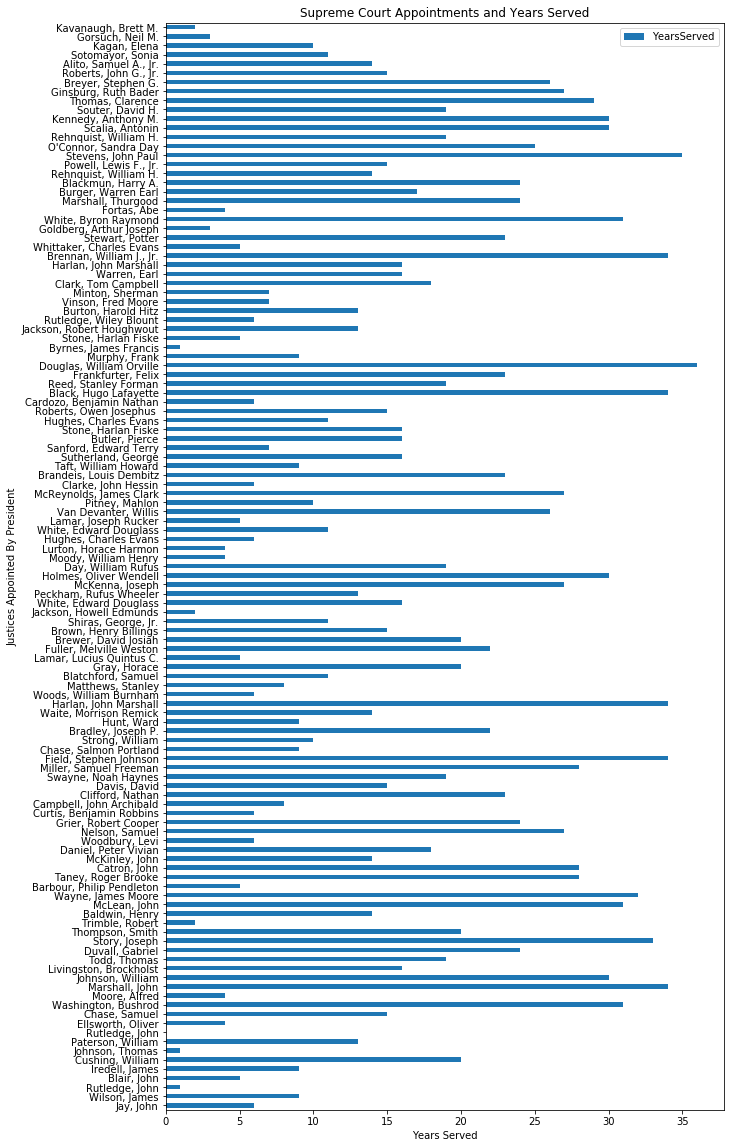

In [37]:
#df.plot(kind='bar',x='name',y='age')
judges = sorted_df.plot(figsize=(10,20), kind='barh', x='JusticeName', y='YearsServed')
plt.title("Supreme Court Appointments and Years Served")
plt.xlabel("Years Served")
plt.ylabel("Justices Appointed By President")
plt.savefig("Judges.png")

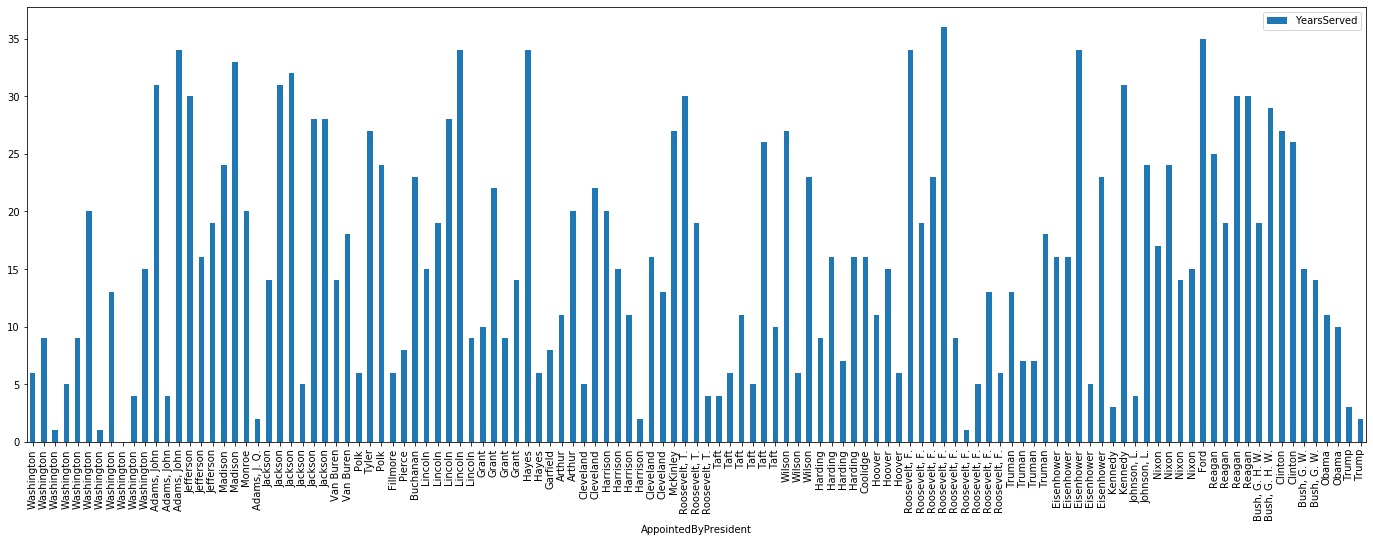

In [12]:
# import matplotlib.pyplot as plt


# gca stands for 'get current axis'
ax = plt.gca()

sorted_df.plot(figsize=(24, 8), kind='bar',x='AppointedByPresident',y='YearsServed',ax=ax, rot=90)
#sorted_df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

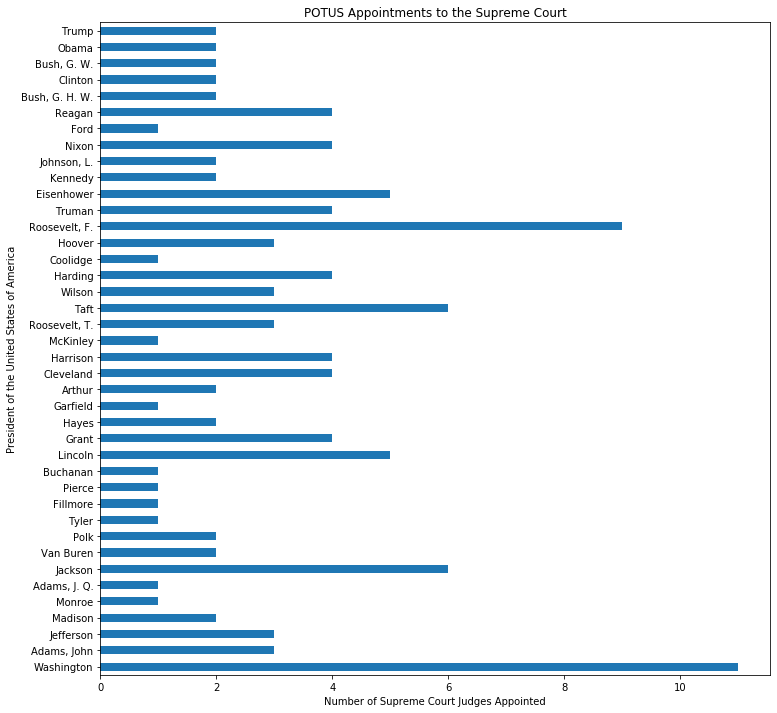

In [67]:
model_counts_by_Potus = sorted_df.groupby('AppointedByPresident', sort=False)['JusticeName'].count()
model_counts_by_Potus

model_counts_by_Potus.plot(kind='barh', figsize=(12, 12))
#plt.gca().invert_yaxis()
plt.title("POTUS Appointments to the Supreme Court")
plt.xlabel("Number of Supreme Court Judges Appointed")
plt.ylabel("President of the United States of America")
#plt.show()
plt.savefig("POTUSappt.png")

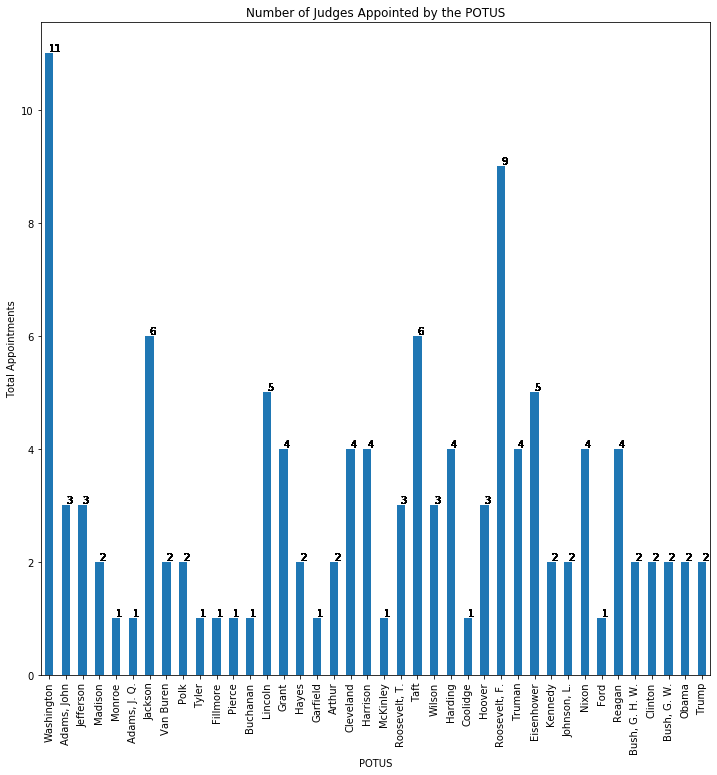

In [68]:
df = model_counts_by_Potus
ax = df.plot(figsize=(12, 12), kind='bar', rot=90) 
plt.title("Number of Judges Appointed by the POTUS")
plt.xlabel("POTUS")
plt.ylabel("Total Appointments")
for idx, label in enumerate(list(df.index)): 
    for acc in df:
            value = df[idx]
            ax.annotate(value,
                        (idx, value),
                         xytext=(0, 2), 
                         textcoords='offset points')
plt.savefig('PotusCountTips.png')

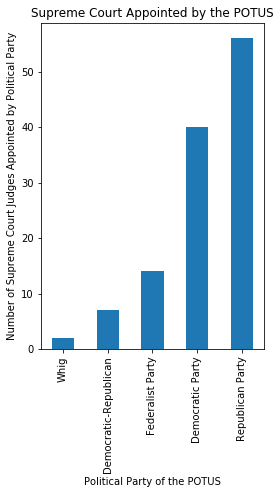

In [44]:
model_counts_by_Party = sorted_df.groupby('PoliticalParty', sort=False)['JusticeName'].count().sort_values(ascending=True)
model_counts_by_Party

model_counts_by_Party.plot(kind='bar', figsize=(4, 6), rot=90)
#plt.gca().invert_yaxis()
plt.title("Supreme Court Appointed by the POTUS")
plt.ylabel("Number of Supreme Court Judges Appointed by Political Party")
plt.xlabel("Political Party of the POTUS")
#plt.show()
plt.savefig("PartyCount.png")

In [69]:
model_counts_by_Party

PoliticalParty
Whig                      2
Democratic-Republican     7
Federalist Party         14
Democratic Party         40
Republican Party         56
Name: JusticeName, dtype: int64

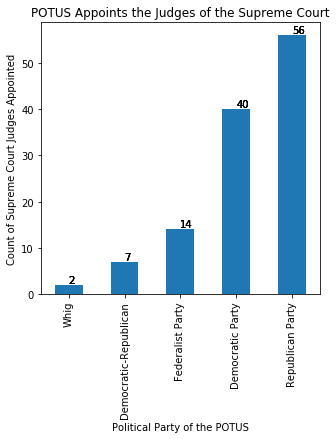

In [73]:
df = model_counts_by_Party
ax = df.plot(figsize=(5, 5), kind='bar', rot=90) 
plt.title("POTUS Appoints the Judges of the Supreme Court")
plt.xlabel("Political Party of the POTUS")
plt.ylabel("Count of Supreme Court Judges Appointed")
for idx, label in enumerate(list(df.index)): 
    for acc in df:
            value = df[idx]
            ax.annotate(value,
                        (idx, value),
                         xytext=(0, 2), 
                         textcoords='offset points')
plt.savefig('PartyCountTips.png')

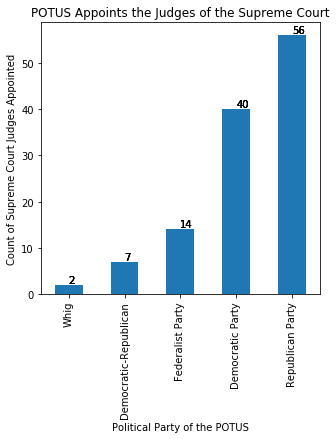

In [75]:
df = model_counts_by_Party
ax = df.plot(figsize=(5, 5), kind='bar', rot=90) 
plt.title("POTUS Appoints the Judges of the Supreme Court")
plt.xlabel("Political Party of the POTUS")
plt.ylabel("Count of Supreme Court Judges Appointed")
for idx, label in enumerate(list(df.index)): 
    for acc in df:
            value = df[idx]
            ax.annotate(value,
                        (idx, value),
                         xytext=(0, 2), 
                         textcoords='offset points')
plt.savefig('PartyCountTips.svg')

0 Whig
1 Democratic-Republican
2 Federalist Party
3 Democratic Party
4 Republican Party


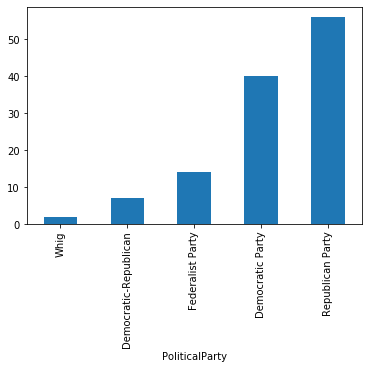

In [39]:
ax = model_counts_by_Party.plot(kind='bar')

for i, label in enumerate(list(model_counts_by_Party.index)):
            print(i, label)
            #ax.annotate()

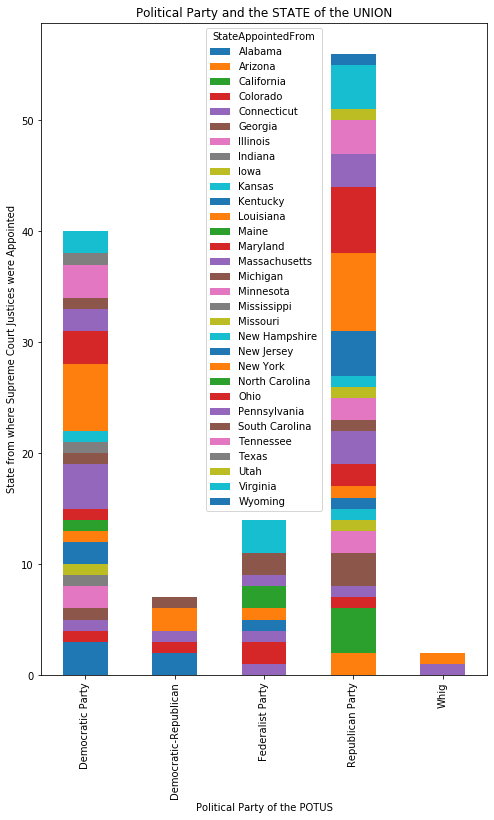

In [45]:
model_counts_by_State = sorted_df.groupby(['PoliticalParty', 'StateAppointedFrom'], sort=True)['JusticeName'].count().sort_values(ascending=True)
model_counts_by_State

model_counts_by_State.unstack().plot(kind='bar', figsize=(8, 12), stacked=True)
#plt.gca().invert_yaxis()
plt.title("Political Party and the STATE of the UNION")
plt.xlabel("Political Party of the POTUS")
plt.ylabel("State from where Supreme Court Justices were Appointed")
#plt.show()
plt.savefig("StateOfTheUnion.png")

In [104]:
#df.sort_values(by=['col1', 'col2'])
#df = df.groupby(['Experiment', 'Step'], sort=False, as_index=False)['value'].aggregate(np.sum)
#sort_by_weather_asc_temp_desc = weather.sort_values(['Weather','Temp (C)'], ascending=[True, False])
#print(sort_by_weather_asc_temp_desc.head(n=3))


SuperSorted_df = readCSV_df.sort_values(by=['PoliticalParty', 'StateAppointedFrom'], ascending=[True, True])

In [103]:
SuperSorted_df.reset_index()

,index,JusticeName,StateAppointedFrom,AppointedByPresident,PoliticalParty,OathTakenOn,DateServiceTerminated,YearIN,YearOUT,YearsServed
0,39,"McKinley, John",Alabama,Van Buren,Democratic Party,"January 9, 1838","July 19, 1852",1838,1852,14
1,45,"Campbell, John Archibald",Alabama,Pierce,Democratic Party,"April 11, 1853","April 30, 1861",1853,1861,8
2,84,"Black, Hugo Lafayette",Alabama,"Roosevelt, F.",Democratic Party,"August 19, 1937","September 17, 1971",1937,1971,34
3,99,"White, Byron Raymond",Colorado,Kennedy,Democratic Party,"April 16, 1962","June 28, 1993",1962,1993,31
4,87,"Douglas, William Orville",Connecticut,"Roosevelt, F.",Democratic Party,"April 17, 1939","November 12, 1975",1939,1975,36
...,...,...,...,...,...,...,...,...,...,...
114,104,"Powell, Lewis F., Jr.",Virginia,Nixon,Republican Party,"January 7, 1972","June 26, 1987",1972,1987,15
115,108,"Scalia, Antonin",Virginia,Reagan,Republican Party,"September 26, 1986","February 13, 2016",1986,2016,30
116,72,"Van Devanter, Willis",Wyoming,Taft,Republican Party,"January 3, 1911","June 2, 1937",1911,1937,26
117,44,"Curtis, Benjamin Robbins",Massachusetts,Fillmore,Whig,"October 10, 1851","September 30, 1857",1851,1857,6


In [98]:
SuperSorted_df

,JusticeName,StateAppointedFrom,AppointedByPresident,PoliticalParty,OathTakenOn,DateServiceTerminated,YearIN,YearOUT,YearsServed
37,"Barbour, Philip Pendleton",Virginia,Jackson,Democratic Party,"May 12, 1836","February 25, 1841",1836,1841,5
40,"Daniel, Peter Vivian",Virginia,Van Buren,Democratic Party,"January 10, 1842","May 31, 1860",1842,1860,18
93,"Clark, Tom Campbell",Texas,Truman,Democratic Party,"August 24, 1949","June 12, 1967",1949,1967,18
38,"Catron, John",Tennessee,Jackson,Democratic Party,"May 1, 1837","May 30, 1865",1837,1865,28
75,"McReynolds, James Clark",Tennessee,Wilson,Democratic Party,"October 12, 1914","January 31, 1941",1914,1941,27
...,...,...,...,...,...,...,...,...,...
109,"Kennedy, Anthony M.",California,Reagan,Republican Party,"February 18, 1988","July 31, 2018",1988,2018,30
105,"Rehnquist, William H.",Arizona,Nixon,Republican Party,"January 7, 1972","September 26, 1986*",1972,1986,14
107,"O'Connor, Sandra Day",Arizona,Reagan,Republican Party,"September 25, 1981","January 31, 2006",1981,2006,25
41,"Nelson, Samuel",New York,Tyler,Whig,"February 27, 1845","November 28, 1872",1845,1872,27


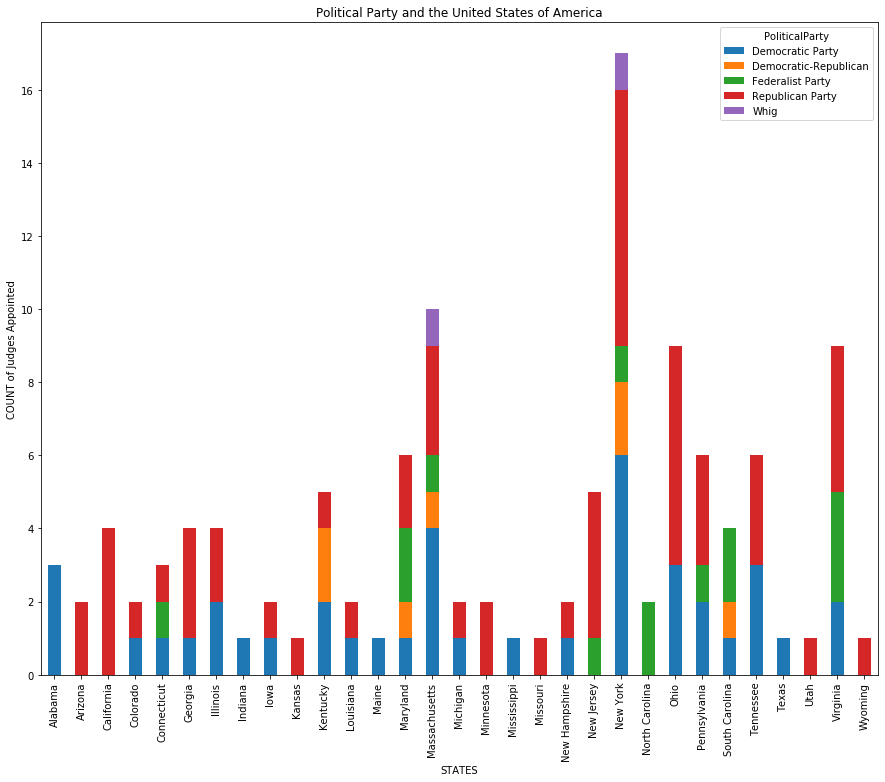

In [105]:
model_counts_by_State = SuperSorted_df.reset_index().groupby(['StateAppointedFrom', 'PoliticalParty'])['JusticeName'].count().sort_values(ascending=False)
#model_counts_by_State

model_counts_by_State.unstack().plot(kind='bar', figsize=(15, 12), stacked=True)
#plt.gca().invert_yaxis()
plt.title("Political Party and the United States of America")
plt.xlabel("STATES")
plt.ylabel("COUNT of Judges Appointed")
#plt.show()
plt.savefig("StackedState.png")

In [106]:
readCSV_df

,JusticeName,StateAppointedFrom,AppointedByPresident,PoliticalParty,OathTakenOn,DateServiceTerminated,YearIN,YearOUT,YearsServed
0,"Jay, John",New York,Washington,Federalist Party,"October 19, 1789","June 29, 1795",1789,1795,6
1,"Rutledge, John",South Carolina,Washington,Federalist Party,"August 12, 1795","December 15, 1795",1795,1795,0
2,"Ellsworth, Oliver",Connecticut,Washington,Federalist Party,"March 8, 1796","December 15, 1800",1796,1800,4
3,"Marshall, John",Virginia,"Adams, John",Federalist Party,"February 4, 1801","July 6, 1835",1801,1835,34
4,"Taney, Roger Brooke",Maryland,Jackson,Democratic Party,"March 28, 1836","October 12, 1864",1836,1864,28
...,...,...,...,...,...,...,...,...,...
114,"Alito, Samuel A., Jr.",New Jersey,"Bush, G. W.",Republican Party,"January 31, 2006","July 23, 2020",2006,2020,14
115,"Sotomayor, Sonia",New York,Obama,Democratic Party,"August 8, 2009","July 23, 2020",2009,2020,11
116,"Kagan, Elena",Massachusetts,Obama,Democratic Party,"August 7, 2010","July 23, 2020",2010,2020,10
117,"Gorsuch, Neil M.",Colorado,Trump,Republican Party,"April 10, 2017","July 23, 2020",2017,2020,3


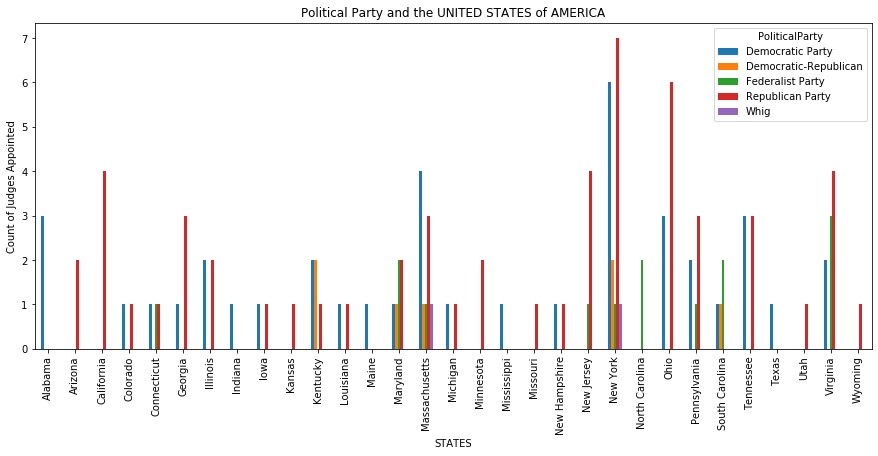

In [107]:
model_counts_by_State = SuperSorted_df.groupby(['StateAppointedFrom', 'PoliticalParty'])['JusticeName'].count().sort_values(ascending=False)
model_counts_by_State

model_counts_by_State.unstack().plot(kind='bar', figsize=(15, 6), stacked=False)
#plt.gca().invert_yaxis()
plt.title("Political Party and the UNITED STATES of AMERICA")
plt.ylabel("Count of Judges Appointed")
plt.xlabel("STATES")
#plt.show()
plt.savefig("UNstackedState.png")

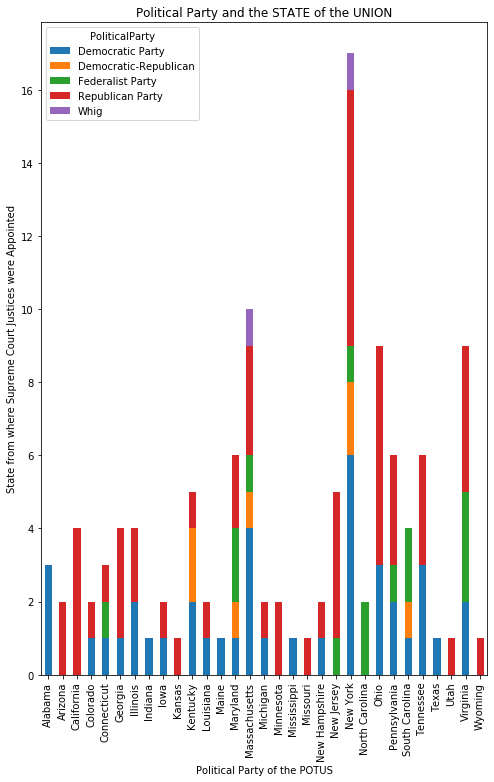

In [108]:
model_counts_by_State = sorted_df.groupby(['StateAppointedFrom', 'PoliticalParty'], sort=True)['JusticeName'].count().sort_values(ascending=True)
model_counts_by_State

model_counts_by_State.unstack().plot(kind='bar', figsize=(8, 12), stacked=True)
#plt.gca().invert_yaxis()
plt.title("Political Party and the STATE of the UNION")
plt.xlabel("Political Party of the POTUS")
plt.ylabel("State from where Supreme Court Justices were Appointed")
#plt.show()
plt.savefig("PartyOfTheUnion.png")

In [109]:
#df.sort_values(by=['col1', 'col2'])
SuperSorted_df = readCSV_df.sort_values(by=['YearsServed'], ascending=False)

In [110]:
SuperSorted_df

,JusticeName,StateAppointedFrom,AppointedByPresident,PoliticalParty,OathTakenOn,DateServiceTerminated,YearIN,YearOUT,YearsServed
87,"Douglas, William Orville",Connecticut,"Roosevelt, F.",Democratic Party,"April 17, 1939","November 12, 1975",1939,1975,36
106,"Stevens, John Paul",Illinois,Ford,Republican Party,"December 19, 1975","June 29, 2010",1975,2010,35
3,"Marshall, John",Virginia,"Adams, John",Federalist Party,"February 4, 1801","July 6, 1835",1801,1835,34
96,"Brennan, William J., Jr.",New Jersey,Eisenhower,Republican Party,"October 16, 1956","July 20, 1990",1956,1990,34
54,"Harlan, John Marshall",Kentucky,Hayes,Republican Party,December 10 1877,"October 14, 1911",1877,1911,34
...,...,...,...,...,...,...,...,...,...
118,"Kavanaugh, Brett M.",Maryland,Trump,Republican Party,"October 6, 2018","July 23, 2020",2018,2020,2
22,"Johnson, Thomas",Maryland,Washington,Federalist Party,"August 6, 1792","January 16, 1793",1792,1793,1
17,"Rutledge, John",South Carolina,Washington,Federalist Party,"February 15, 1790","March 5, 1791",1790,1791,1
89,"Byrnes, James Francis",South Carolina,"Roosevelt, F.",Democratic Party,"July 8, 1941","October 3, 1942",1941,1942,1


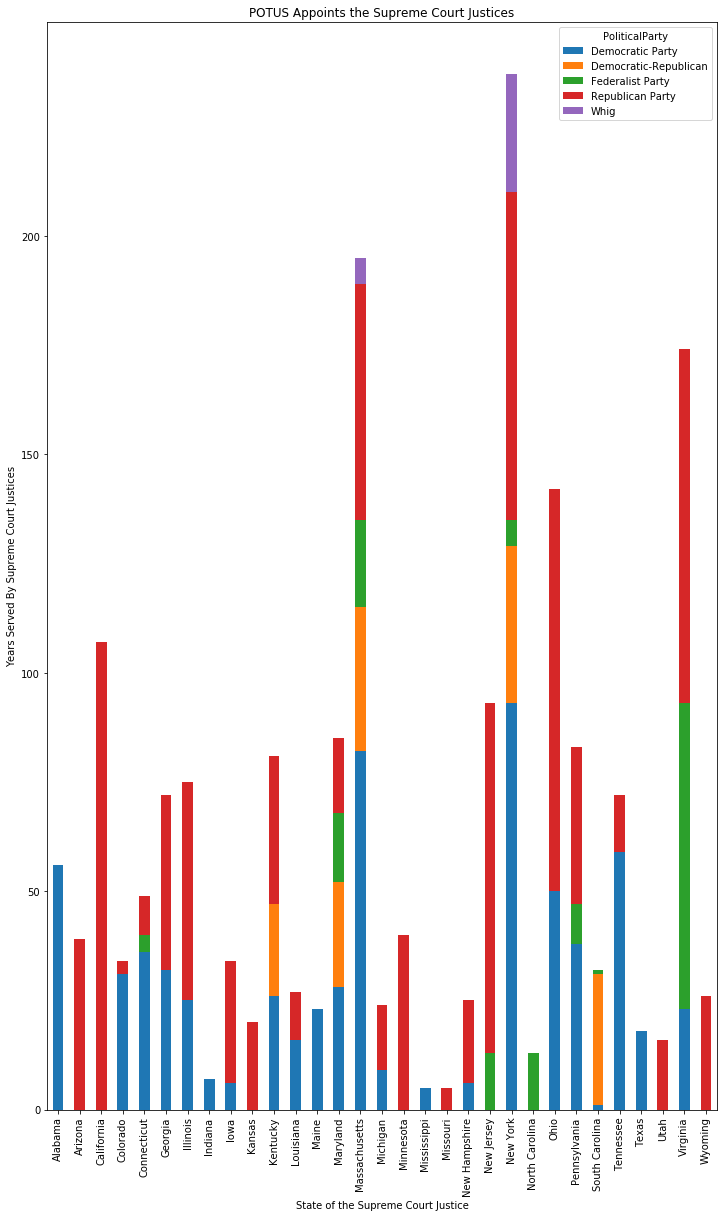

In [111]:
model_counts_by_SS = SuperSorted_df.groupby(['StateAppointedFrom', 'PoliticalParty'])['YearsServed'].sum()
model_counts_by_SS

model_counts_by_SS.unstack().plot(kind='bar', figsize=(12, 20), stacked=True)
#plt.gca().invert_yaxis()
plt.title("POTUS Appoints the Supreme Court Justices")
plt.xlabel("State of the Supreme Court Justice")
plt.ylabel("Years Served By Supreme Court Justices")
#plt.show()
plt.savefig("SS.png")

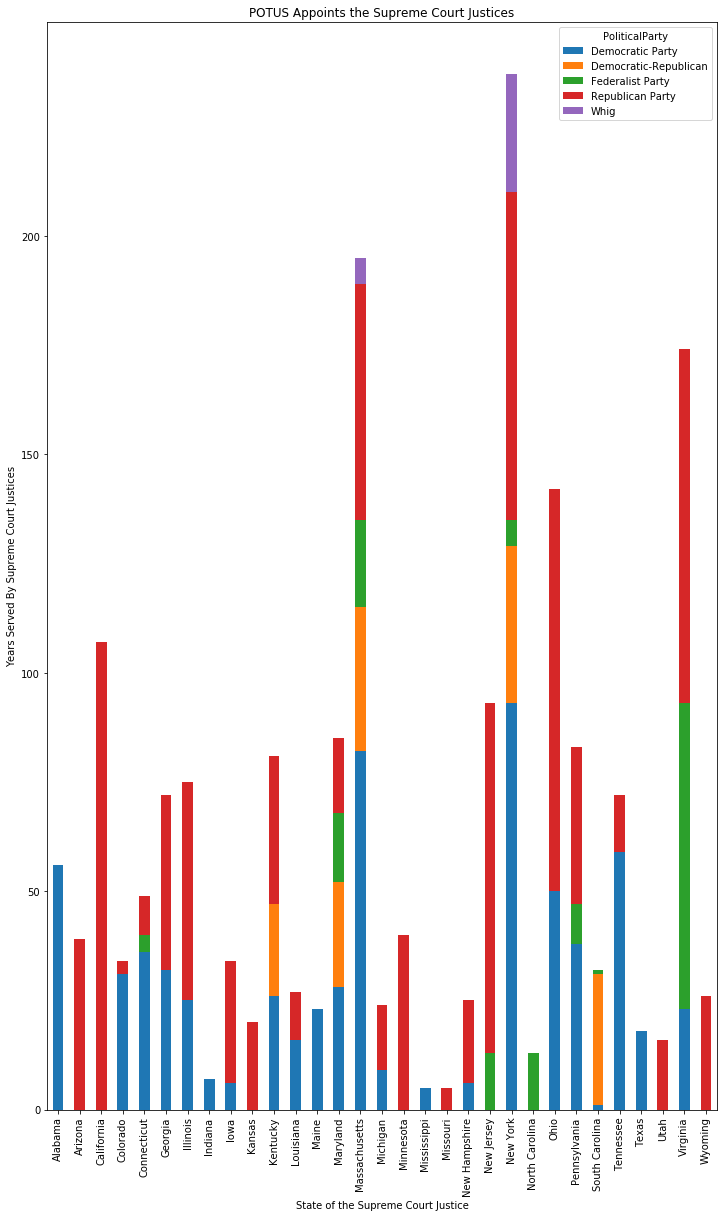

In [112]:
model_counts_by_YearIN = sorted_df.groupby(['StateAppointedFrom', 'PoliticalParty'])['YearsServed'].sum()
model_counts_by_YearIN

model_counts_by_YearIN.unstack().plot(kind='bar', figsize=(12, 20), stacked=True)
#plt.gca().invert_yaxis()
plt.title("POTUS Appoints the Supreme Court Justices")
plt.xlabel("State of the Supreme Court Justice")
plt.ylabel("Years Served By Supreme Court Justices")
#plt.show()
plt.savefig("TotalYears.png")

In [115]:
from splinter import Browser
from bs4 import BeautifulSoup as bs

In [116]:
splinter.__version__

'0.13.0'

In [117]:
bs

bs4.BeautifulSoup

### Set ChromeDriver executable path

### Mac Users

In [118]:
!which chromedriver

/usr/local/bin/chromedriver


In [119]:
from webdriver_manager.chrome import ChromeDriverManager

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path)

[WDM] - Current google-chrome version is 84.0.4147
[WDM] - Get LATEST driver version for 84.0.4147
[WDM] - Get LATEST driver version for 84.0.4147


[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/84.0.4147.30/chromedriver_mac64.zip
[WDM] - Driver has been saved in cache [/Users/shiuliganguly/.wdm/drivers/chromedriver/mac64/84.0.4147.30]


In [120]:
supreme_url = 'https://www.supremecourt.gov/about/members_text.aspx'

In [121]:
justices = browser.visit(supreme_url)

In [122]:
type(justices)

NoneType

In [123]:
justices = browser.html

In [124]:
type(justices)

str

In [125]:
# pip install lxml
justices_bs = bs(justices, features='html.parser')

In [126]:
type(justices_bs)

bs4.BeautifulSoup

In [127]:
justices_bs

<html xmlns="http://www.w3.org/1999/xhtml"><head id="ctl00_ctl00_Head1"><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="txt/html; charset=utf-8" http-equiv="content-type"/><meta content="width=device-width, initial-scale=1" name="viewport"/>
<script src="/js/jquery-3.1.0.min.js" type="text/javascript"></script>
<script src="/js/bootstrap.js" type="text/javascript"></script>
<link href="/css/font-awesome.min.css" rel="stylesheet" type="text/css"/>
<link href="/css/bootstrap.min.css" rel="Stylesheet" type="text/css"/>
<link href="/css/bootstrap-theme.min.css" rel="Stylesheet" type="text/css"/>
<link href="/styles/newBootStrap2.css" rel="stylesheet" type="text/css"/>
<!-- HTML5 shim and Respond.js IE8 support of HTML5 elements and media queries -->
<!--[if lt IE 9]>
          <script src="/js/html5shiv.js"></script>
          <script src="/js/respond.min.js"></script>
        <![endif]-->
<!--[if lt IE 8]>
          <link rel="stylesheet" type="text/css" href="css/boo

In [128]:
def isListItem(tag):
    return True if (tag.name == 'li')and len(tag.get_text()) > 0 else False

In [129]:
def isTable(tag):
    return True if (tag.name == 'table')and len(tag.get_text()) > 0 else False

In [130]:
def isTableData(tag):
    return True if (tag.name == 'td')and len(tag.get_text()) > 0 else False

In [131]:
def isTableRow(tag):
    return True if (tag.name == 'tr')and len(tag.get_text()) > 0 else False

In [132]:
def isTableHead(tag):
    return True if (tag.name == 'th')and len(tag.get_text()) > 0 else False

In [133]:
def isH4(tag):
    return True if (tag.name == 'h4')and len(tag.get_text()) > 0 else False

### Table Head

In [134]:
tags = justices_bs.find_all(isTableHead, limit = 10)
for tag in tags:
    print(tag.get_text(), '\n')

Name 

State App't From 

Appointed by President 

Judicial Oath Taken 

Date Service Terminated 

Name 

State App't From 

Appointed by President 

Judicial Oath Taken 

Date Service Terminated 



In [135]:
tags = justices_bs.find_all(isTable, limit = 5)
for tag in tags:
    print(tag.get_text(), '\n')










SEARCH TIPS
Search term too short 
Invalid text in search term. Try again



ADVANCED SEARCH
DOCKET SEARCH


 




Name
State App't From
Appointed by President
Judicial Oath Taken
Date Service Terminated


Jay, John
New York
Washington
(a) October 19, 1789
June 29, 1795


Rutledge, John
South Carolina
Washington
August 12, 1795
December 15, 1795


Ellsworth, Oliver
Connecticut
Washington
March 8, 1796
December 15, 1800


Marshall, John
Virginia
Adams, John
February 4, 1801
July 6, 1835


Taney, Roger Brooke
Maryland
Jackson
March 28, 1836
October 12, 1864


Chase, Salmon Portland
Ohio
Lincoln
December 15, 1864
May 7, 1873


Waite, Morrison Remick
Ohio
Grant
March 4, 1874
March 23, 1888


Fuller, Melville Weston
Illinois
Cleveland
October 8, 1888
July 4, 1910


White, Edward Douglass
Louisiana
Taft
December 19, 1910
May 19, 1921


Taft, William Howard
Connecticut
Harding
July 11, 1921
February 3, 1930


Hughes, Charles Evans
New York
Hoover
February 24, 1930
June 30, 1941


Sto

In [136]:
 #<div id="ctl00_ctl00_MainEditable_mainContent_RadEditor1">

In [137]:
#<div id="ctl00_ctl00_MainEditable_mainContent_RadEditor1">
# Use dictionary to pass key : value pair
container  = justices_bs.find_all('div', { "id" : "ctl00_ctl00_MainEditable_mainContent_RadEditor1"}) 
print("Number of Containers:", len(container))
print("#####################################################")

###############################################################
# justices_info = []

justices_info = []
get_tr = ""

for content in container:
    tags = content.find_all(isTableRow)
    for tag in tags:
        print(tag.get_text(), '\n')
        get_tr = tag.get_text().strip()
        justices_info.append(get_tr)

Number of Containers: 1
#####################################################

Name
State App't From
Appointed by President
Judicial Oath Taken
Date Service Terminated
 


Jay, John
New York
Washington
(a) October 19, 1789
June 29, 1795
 


Rutledge, John
South Carolina
Washington
August 12, 1795
December 15, 1795
 


Ellsworth, Oliver
Connecticut
Washington
March 8, 1796
December 15, 1800
 


Marshall, John
Virginia
Adams, John
February 4, 1801
July 6, 1835
 


Taney, Roger Brooke
Maryland
Jackson
March 28, 1836
October 12, 1864
 


Chase, Salmon Portland
Ohio
Lincoln
December 15, 1864
May 7, 1873
 


Waite, Morrison Remick
Ohio
Grant
March 4, 1874
March 23, 1888
 


Fuller, Melville Weston
Illinois
Cleveland
October 8, 1888
July 4, 1910
 


White, Edward Douglass
Louisiana
Taft
December 19, 1910
May 19, 1921
 


Taft, William Howard
Connecticut
Harding
July 11, 1921
February 3, 1930
 


Hughes, Charles Evans
New York
Hoover
February 24, 1930
June 30, 1941
 


Stone, Harlan Fiske
New 

In [138]:
len(justices_info)

121

In [139]:
justices_info[0]

"Name\nState App't From\nAppointed by President\nJudicial Oath Taken\nDate Service Terminated"

In [140]:
justices_info[18]

"Name\nState App't From\nAppointed by President\nJudicial Oath Taken\nDate Service Terminated"

In [141]:
justices_info[18].split("\n") 

['Name',
 "State App't From",
 'Appointed by President',
 'Judicial Oath Taken',
 'Date Service Terminated']

In [142]:
row = []
row = justices_info[0].split("\n") 
for data in row:
    print(data)

Name
State App't From
Appointed by President
Judicial Oath Taken
Date Service Terminated


In [143]:
for column in row:
    print(column)

Name
State App't From
Appointed by President
Judicial Oath Taken
Date Service Terminated


In [144]:
JusticeName_list = []
StateAppointedFrom_list = []
AppointedByPresident_list = []
OathTakenOn_list = []
DateServiceTerminated_list = []

In [145]:
import datetime as dt     
date = dt.datetime.today().strftime("%B %d, %Y")

In [146]:
date

'July 26, 2020'

In [147]:
#date = 'current'

In [148]:
header = justices_info[0]
header

"Name\nState App't From\nAppointed by President\nJudicial Oath Taken\nDate Service Terminated"

In [149]:
JusticeName_list = []
StateAppointedFrom_list = []
AppointedByPresident_list = []
OathTakenOn_list = []
DateServiceTerminated_list = []

total = len(justices_info)

#Start at One to remove Table Head
for index in range(0, total):
    if (justices_info[index]!=header):
        row = []
        row = justices_info[index].split("\n")
        #POTUS
        POTUS = row[2]
        potus = POTUS.lstrip()
        Potus = potus.rstrip()
        row[2] = Potus
        if (len(row)==5):
            JusticeName_list.append(row[0])
            StateAppointedFrom_list.append(row[1])
            AppointedByPresident_list.append(row[2])
            OathTakenOn_list.append(row[3])
            DateServiceTerminated_list.append(row[4])
        else: 
            if (len(row)==4):
                    JusticeName_list.append(row[0])
                    StateAppointedFrom_list.append(row[1])
                    AppointedByPresident_list.append(row[2])
                    OathTakenOn_list.append(row[3])                    
                    DateServiceTerminated_list.append(date)       

In [150]:
JusticeName_list

['Jay, John',
 'Rutledge, John',
 'Ellsworth, Oliver',
 'Marshall, John',
 'Taney, Roger Brooke',
 'Chase, Salmon Portland',
 'Waite, Morrison Remick',
 'Fuller, Melville Weston',
 'White, Edward Douglass',
 'Taft, William Howard',
 'Hughes, Charles Evans',
 'Stone, Harlan Fiske',
 'Vinson, Fred Moore',
 'Warren, Earl',
 'Burger, Warren Earl',
 'Rehnquist, William H.',
 'Roberts, John G., Jr.',
 'Rutledge, John',
 'Cushing, William',
 'Wilson, James',
 'Blair, John',
 'Iredell, James',
 'Johnson, Thomas',
 'Paterson, William',
 'Chase, Samuel',
 'Washington, Bushrod',
 'Moore, Alfred',
 'Johnson, William',
 'Livingston, Brockholst',
 'Todd, Thomas',
 'Duvall, Gabriel',
 'Story, Joseph',
 'Thompson, Smith',
 'Trimble, Robert',
 'McLean, John',
 'Baldwin, Henry',
 'Wayne, James Moore',
 'Barbour, Philip Pendleton',
 'Catron, John',
 'McKinley, John',
 'Daniel, Peter Vivian',
 'Nelson, Samuel',
 'Woodbury, Levi',
 'Grier, Robert Cooper',
 'Curtis, Benjamin Robbins',
 'Campbell, John Archi

In [151]:
AppointedByPresident_list


['Washington',
 'Washington',
 'Washington',
 'Adams, John',
 'Jackson',
 'Lincoln',
 'Grant',
 'Cleveland',
 'Taft',
 'Harding',
 'Hoover',
 'Roosevelt, F.',
 'Truman',
 'Eisenhower',
 'Nixon',
 'Reagan',
 'Bush, G. W.',
 'Washington',
 'Washington',
 'Washington',
 'Washington',
 'Washington',
 'Washington',
 'Washington',
 'Washington',
 'Adams, John',
 'Adams, John',
 'Jefferson',
 'Jefferson',
 'Jefferson',
 'Madison',
 'Madison',
 'Monroe',
 'Adams, J. Q.',
 'Jackson',
 'Jackson',
 'Jackson',
 'Jackson',
 'Jackson',
 'Van Buren',
 'Van Buren',
 'Tyler',
 'Polk',
 'Polk',
 'Fillmore',
 'Pierce',
 'Buchanan',
 'Lincoln',
 'Lincoln',
 'Lincoln',
 'Lincoln',
 'Grant',
 'Grant',
 'Grant',
 'Hayes',
 'Hayes',
 'Garfield',
 'Arthur',
 'Arthur',
 'Cleveland',
 'Harrison',
 'Harrison',
 'Harrison',
 'Harrison',
 'Cleveland',
 'Cleveland',
 'McKinley',
 'Roosevelt, T.',
 'Roosevelt, T.',
 'Roosevelt, T.',
 'Taft',
 'Taft',
 'Taft',
 'Taft',
 'Taft',
 'Wilson',
 'Wilson',
 'Wilson',
 'Hardi

### Clean Oath Taken On Date

In [152]:
# Removes "(a)" or (b) or (1) ... anything in Brackets
result = []
space = " "
exampleBefore = OathTakenOn_list[0]
result = exampleBefore.split(" ")

    
if ("(" in result[0]):
    if (")" in result[0]):
        result.remove(result[0])
        

if (len(result)>1):
    exampleAfter = ""
    for i in range(len(result)):
        exampleAfter = exampleAfter + result[i] + space

print(exampleBefore)
print(exampleAfter)
        

(a) October 19, 1789
October 19, 1789 


### Return Year from Date Terminated Info 

In [153]:
# Problem with 105, it has an asterix
result = []
space = " "
exampleBefore = DateServiceTerminated_list[105]
exampleAfter = exampleBefore
result = exampleBefore.split(" ")
print(result)
if (len(result)==1):
    year = result[0]
else:
    if (len(result)>1):
        for i in range(len(result)):
            if ("*" in result[2]):
                year = result[2][:4]

print(exampleBefore)
print(exampleAfter)
print(year)
        

['September', '26,', '1986*']
September 26, 1986*
September 26, 1986*
1986


### Get Year

In [154]:
def getYearOut(dateTerminatedindex):
# Problem with 105, it has an asterix
    result = []
    space = " "
    exampleBefore = DateServiceTerminated_list[105]
    exampleAfter = exampleBefore
    result = exampleBefore.split(" ")
    if (len(result)==1):
        year = result[0]
    else:
        if (len(result)>1):
            for i in range(len(result)):
                if ("*" in result[2]):
                    year = result[2][:4]

    return year

In [155]:
def cleanDate(dateBefore):
    result = []
    space = " "
    exampleBefore = dateBefore
    result = exampleBefore.split(" ")

    if ("(" in result[0]):
        if (")" in result[0]):
            result.remove(result[0])
        
    if (len(result)>1):
        exampleAfter = ""
        for i in range(len(result)):
            exampleAfter = exampleAfter + result[i] + space

    
    dateAfter = exampleAfter   
    return dateAfter

In [156]:
OathTakenOn_list

for i in range(len(OathTakenOn_list)):
    OathTakenOn_list[i] = cleanDate(OathTakenOn_list[i] )

In [157]:
OathTakenOn_list

['October 19, 1789 ',
 'August 12, 1795 ',
 'March 8, 1796 ',
 'February 4, 1801 ',
 'March 28, 1836 ',
 'December 15, 1864 ',
 'March 4, 1874 ',
 'October 8, 1888 ',
 'December 19, 1910 ',
 'July 11, 1921 ',
 'February 24, 1930 ',
 'July 3, 1941 ',
 'June 24, 1946 ',
 'October 5, 1953 ',
 'June 23, 1969 ',
 'September 26, 1986 ',
 'September 29, 2005 ',
 'February 15, 1790 ',
 'February 2, 1790 ',
 'October 5, 1789 ',
 'February 2, 1790 ',
 'May 12, 1790 ',
 'August 6, 1792 ',
 'March 11, 1793 ',
 'February 4, 1796 ',
 'November 9, 1798 ',
 'April 21, 1800 ',
 'May 7, 1804 ',
 'January 20, 1807 ',
 'May 4, 1807 ',
 'November 23, 1811 ',
 'February 3, 1812 ',
 'September 1, 1823 ',
 'June 16, 1826 ',
 'January 11, 1830 ',
 'January 18, 1830 ',
 'January 14, 1835 ',
 'May 12, 1836 ',
 'May 1, 1837 ',
 'January 9, 1838 ',
 'January 10, 1842 ',
 'February 27, 1845 ',
 'September 23, 1845 ',
 'August 10, 1846 ',
 'October 10, 1851 ',
 'April 11, 1853 ',
 'January 21, 1858 ',
 'January 27, 

### Year IN from Oath Taken On Date (Month Day, YearIN)

In [158]:
YearIN = ""
space = ""
oathDate = OathTakenOn_list[5]
result = []
space = " "
exampleBefore = OathTakenOn_list[0]
result = exampleBefore.split(" ")
print(result)
result.reverse()
print(result)
if (result[0]==''):
    print(result[1])
    YearIN = result[1]
    if int(YearIN):
        print("Integer")
    else:
        YearIN = "0000"

['October', '19,', '1789', '']
['', '1789', '19,', 'October']
1789
Integer


### get Year from Date Oath Taken

In [159]:
def getYear(index):
    YearIN = "XXXX"
    space = " "
    i = index
    oathDateIN = OathTakenOn_list[i]
    result = []
    result = oathDateIN.split(" ")
    result.reverse()
    if (result[0]=='')or(result[0]==space):
        YearIN = result[1]
        if  len(YearIN)>3:
            YearIN = YearIN[-4:]

    return YearIN

In [160]:
# Example
print(getYear(77))

1916


### Problems with the Date Data index 76

In [161]:
# Example
print("########### Problem No space after Comma ##############")
print(getYear(77))
print(OathTakenOn_list[76])

########### Problem No space after Comma ##############
1916
June 5,1916 


## Year IN

In [162]:
YearIN = []
for index in range(len(OathTakenOn_list)):
    year = getYear(index)
    YearIN.append(year)

In [163]:
YearIN

['1789',
 '1795',
 '1796',
 '1801',
 '1836',
 '1864',
 '1874',
 '1888',
 '1910',
 '1921',
 '1930',
 '1941',
 '1946',
 '1953',
 '1969',
 '1986',
 '2005',
 '1790',
 '1790',
 '1789',
 '1790',
 '1790',
 '1792',
 '1793',
 '1796',
 '1798',
 '1800',
 '1804',
 '1807',
 '1807',
 '1811',
 '1812',
 '1823',
 '1826',
 '1830',
 '1830',
 '1835',
 '1836',
 '1837',
 '1838',
 '1842',
 '1845',
 '1845',
 '1846',
 '1851',
 '1853',
 '1858',
 '1862',
 '1862',
 '1862',
 '1863',
 '1870',
 '1870',
 '1873',
 '1877',
 '1881',
 '1881',
 '1882',
 '1882',
 '1888',
 '1890',
 '1891',
 '1892',
 '1893',
 '1894',
 '1896',
 '1898',
 '1902',
 '1903',
 '1906',
 '1910',
 '1910',
 '1911',
 '1911',
 '1912',
 '1914',
 '1916',
 '1916',
 '1922',
 '1923',
 '1923',
 '1925',
 '1930',
 '1932',
 '1937',
 '1938',
 '1939',
 '1939',
 '1940',
 '1941',
 '1941',
 '1943',
 '1945',
 '1949',
 '1949',
 '1955',
 '1956',
 '1957',
 '1958',
 '1962',
 '1962',
 '1965',
 '1967',
 '1970',
 '1972',
 '1972',
 '1975',
 '1981',
 '1986',
 '1988',
 '1990',
 

In [164]:
# Example
print(getYear(77))

1916


### Year Out from Date Service Terminated List

In [165]:
# Example
DateServiceTerminated_list[0]

'June 29, 1795'

In [166]:
def getYearOut(dateTerminatedindex):
# Problem with 105, it has an asterix
    result = []
    space = " "
    index = dateTerminatedindex
    exampleBefore = DateServiceTerminated_list[index]
    exampleAfter = exampleBefore
    result = exampleBefore.split(" ")
    if (len(result)==1):
        year = result[0]
    else:
        if (len(result)>1):
                if ("*" in result[2]):
                    year = result[2][:4]
                else:
                    year = result[2]

    return year

In [167]:
# Example
n=115
print(DateServiceTerminated_list[n]," Year :", getYearOut(n))

July 26, 2020  Year : 2020


In [168]:
YearOUT = []
for index in range(len(DateServiceTerminated_list)):
    year = getYearOut(index)
    YearOUT.append(year)

### Year OUT has "current" if Judge is Active

# YearOUT has 2020 if Judge is active

In [169]:
YearOUT

['1795',
 '1795',
 '1800',
 '1835',
 '1864',
 '1873',
 '1888',
 '1910',
 '1921',
 '1930',
 '1941',
 '1946',
 '1953',
 '1969',
 '1986',
 '2005',
 '2020',
 '1791',
 '1810',
 '1798',
 '1795',
 '1799',
 '1793',
 '1806',
 '1811',
 '1829',
 '1804',
 '1834',
 '1823',
 '1826',
 '1835',
 '1845',
 '1843',
 '1828',
 '1861',
 '1844',
 '1867',
 '1841',
 '1865',
 '1852',
 '1860',
 '1872',
 '1851',
 '1870',
 '1857',
 '1861',
 '1881',
 '1881',
 '1890',
 '1877',
 '1897',
 '1880',
 '1892',
 '1882',
 '1911',
 '1887',
 '1889',
 '1902',
 '1893',
 '1893',
 '1910',
 '1906',
 '1903',
 '1895',
 '1910',
 '1909',
 '1925',
 '1932',
 '1922',
 '1910',
 '1914',
 '1916',
 '1937',
 '1916',
 '1922',
 '1941',
 '1939',
 '1922',
 '1938',
 '1939',
 '1930',
 '1941',
 '1945',
 '1938',
 '1971',
 '1957',
 '1962',
 '1975',
 '1949',
 '1942',
 '1954',
 '1949',
 '1958',
 '1967',
 '1956',
 '1971',
 '1990',
 '1962',
 '1981',
 '1993',
 '1965',
 '1969',
 '1991',
 '1994',
 '1987',
 '1986',
 '2010',
 '2006',
 '2016',
 '2018',
 '2009',
 

In [170]:
justice_league_df = pd.DataFrame(list(zip(JusticeName_list,
StateAppointedFrom_list,
AppointedByPresident_list,
OathTakenOn_list,
DateServiceTerminated_list,YearIN, YearOUT)), columns=["JusticeName", "StateAppointedFrom", "AppointedByPresident", "OathTakenOn", "DateServiceTerminated", "YearIN", "YearOUT"])

In [171]:
justice_league_df

,JusticeName,StateAppointedFrom,AppointedByPresident,OathTakenOn,DateServiceTerminated,YearIN,YearOUT
0,"Jay, John",New York,Washington,"October 19, 1789","June 29, 1795",1789,1795
1,"Rutledge, John",South Carolina,Washington,"August 12, 1795","December 15, 1795",1795,1795
2,"Ellsworth, Oliver",Connecticut,Washington,"March 8, 1796","December 15, 1800",1796,1800
3,"Marshall, John",Virginia,"Adams, John","February 4, 1801","July 6, 1835",1801,1835
4,"Taney, Roger Brooke",Maryland,Jackson,"March 28, 1836","October 12, 1864",1836,1864
...,...,...,...,...,...,...,...
114,"Alito, Samuel A., Jr.",New Jersey,"Bush, G. W.","January 31, 2006","July 26, 2020",2006,2020
115,"Sotomayor, Sonia",New York,Obama,"August 8, 2009","July 26, 2020",2009,2020
116,"Kagan, Elena",Massachusetts,Obama,"August 7, 2010","July 26, 2020",2010,2020
117,"Gorsuch, Neil M.",Colorado,Trump,"April 10, 2017","July 26, 2020",2017,2020


In [172]:
justice_league_df.to_csv("justiceLeague.csv", index=False)

In [173]:
justice_league_df.to_csv("justices.csv", index=False)

### Appointed by Democrat or Republican President

In [174]:
AppointedByPresident_list

['Washington',
 'Washington',
 'Washington',
 'Adams, John',
 'Jackson',
 'Lincoln',
 'Grant',
 'Cleveland',
 'Taft',
 'Harding',
 'Hoover',
 'Roosevelt, F.',
 'Truman',
 'Eisenhower',
 'Nixon',
 'Reagan',
 'Bush, G. W.',
 'Washington',
 'Washington',
 'Washington',
 'Washington',
 'Washington',
 'Washington',
 'Washington',
 'Washington',
 'Adams, John',
 'Adams, John',
 'Jefferson',
 'Jefferson',
 'Jefferson',
 'Madison',
 'Madison',
 'Monroe',
 'Adams, J. Q.',
 'Jackson',
 'Jackson',
 'Jackson',
 'Jackson',
 'Jackson',
 'Van Buren',
 'Van Buren',
 'Tyler',
 'Polk',
 'Polk',
 'Fillmore',
 'Pierce',
 'Buchanan',
 'Lincoln',
 'Lincoln',
 'Lincoln',
 'Lincoln',
 'Grant',
 'Grant',
 'Grant',
 'Hayes',
 'Hayes',
 'Garfield',
 'Arthur',
 'Arthur',
 'Cleveland',
 'Harrison',
 'Harrison',
 'Harrison',
 'Harrison',
 'Cleveland',
 'Cleveland',
 'McKinley',
 'Roosevelt, T.',
 'Roosevelt, T.',
 'Roosevelt, T.',
 'Taft',
 'Taft',
 'Taft',
 'Taft',
 'Taft',
 'Wilson',
 'Wilson',
 'Wilson',
 'Hardi

In [175]:
SetPOTUS = set()

In [176]:
SetPOTUS = set()
for potus in AppointedByPresident_list:
    potus = potus.lstrip()
    potus = potus.rstrip()
    SetPOTUS.add(potus)

In [177]:
SetPOTUS

{'Adams, J. Q.',
 'Adams, John',
 'Arthur',
 'Buchanan',
 'Bush, G. H. W.',
 'Bush, G. W.',
 'Cleveland',
 'Clinton',
 'Coolidge',
 'Eisenhower',
 'Fillmore',
 'Ford',
 'Garfield',
 'Grant',
 'Harding',
 'Harrison',
 'Hayes',
 'Hoover',
 'Jackson',
 'Jefferson',
 'Johnson, L.',
 'Kennedy',
 'Lincoln',
 'Madison',
 'McKinley',
 'Monroe',
 'Nixon',
 'Obama',
 'Pierce',
 'Polk',
 'Reagan',
 'Roosevelt, F.',
 'Roosevelt, T.',
 'Taft',
 'Truman',
 'Trump',
 'Tyler',
 'Van Buren',
 'Washington',
 'Wilson'}

In [178]:
len(SetPOTUS)

40

### Democrat or Republican

In [179]:
# https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States

### Political Parties of the Presidents
https://www.presidentsusa.net/partyofpresidents.html

In [180]:
pparty_url = 'https://www.presidentsusa.net/partyofpresidents.html'
pparty = browser.visit(pparty_url)
pparty = browser.html
pparty_bs = bs(pparty, features='html.parser')
pparty_bs



<html class="no-js wf-proximanova-n4-active wf-proximanova-i7-active wf-proximanova-i4-active wf-proximanova-n7-active wf-grad-n4-active wf-active" lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=1024" name="viewport"/>
<meta content="List that shows which party each U.S. President belonged to." name="description"/>
<meta content="Democratic presidents, Republican presidents, whigs, unionist, federalists, rebuplican, wigs, repuplicans" name="keywords"/>
<title>Political Parties of the Presidents</title>
<link href="css/bootstrap.css" rel="stylesheet"/>
<link href="css/style.css" rel="stylesheet"/>
<script src="https://partner.googleadservices.com/gampad/cookie.js?domain=www.presidentsusa.net&amp;callback=_gfp_s_&amp;client=ca-pub-9426863964591694"></script><script id="google_shimpl" src="https://pagead2.googlesyndication.com/pagead/js/r20200723/r20190131/show_ads_impl_fy2019.js"></script><script async="" src="https://ssl.google-analytics.com/ga.js" type="text/javascript">

In [181]:
# Use dictionary to pass key : value pair
container  = pparty_bs.find_all('div', { "class" : "col-xs-3"}) 
print("Number of Containers:", len(container))
print("#####################################################", '\n')

###############################################################

get_tr = ""

print("Presidential Party Type", '\n')
print("#####################################################")
for content in container:
    tags = content.find_all(isH4)
    for tag in tags:
        print(tag.get_text(), '\n')

Number of Containers: 4
##################################################### 

Presidential Party Type 

#####################################################
Republican 

Democrat 

Federalist 

Democratic-Republican 

Whig 

Union 



In [182]:
RepublicanPresidents = []
DemocratPresidents = []
FederalistPresidents = []
D_R_Presidents = []
Whig_Presidents = []
Union_President = []

In [183]:
allPresidents = []
tags = pparty_bs.find_all(isListItem)
for tag in tags:
    print(tag.get_text(), '\n')
    allPresidents.append(tag.get_text())

Abraham Lincoln 

Ulysses S. Grant 

Rutherford B. Hayes 

James Garfield 

Chester Arthur 

Benjamin Harrison 

William McKinley 

Theodore Roosevelt 

William Howard Taft 

Warren Harding 

Calvin Coolidge 

Herbert Hoover 

Dwight Eisenhower 

Richard Nixon 

Gerald Ford 

Ronald Reagan 

George Bush 

George W. Bush 

Donald Trump 

Andrew Jackson 

Martin Van Buren 

James K. Polk 

Franklin Pierce 

James Buchanan 

Grover Cleveland 

Woodrow Wilson 

Franklin D. Roosevelt 

Harry Truman 

John F. Kennedy 

Lyndon Johnson 

Jimmy Carter 

Bill Clinton 

Barack Obama 

George Washington 

John Adams 

Thomas Jefferson 

James Madison 

James Monroe 

John Quincy Adams 

William Henry Harrison 

John Tyler 

Zachary Taylor 

Millard Fillmore 

Andrew Johnson 



In [184]:
allPresidents

['Abraham Lincoln',
 'Ulysses S. Grant',
 'Rutherford B. Hayes',
 'James Garfield',
 'Chester Arthur',
 'Benjamin Harrison',
 'William McKinley',
 'Theodore Roosevelt',
 'William Howard Taft',
 'Warren Harding',
 'Calvin Coolidge',
 'Herbert Hoover',
 'Dwight Eisenhower',
 'Richard Nixon',
 'Gerald Ford',
 'Ronald Reagan',
 'George Bush',
 'George W. Bush',
 'Donald Trump',
 'Andrew Jackson',
 'Martin Van Buren',
 'James K. Polk',
 'Franklin Pierce',
 'James Buchanan',
 'Grover Cleveland',
 'Woodrow Wilson',
 'Franklin D. Roosevelt',
 'Harry Truman',
 'John F. Kennedy',
 'Lyndon Johnson',
 'Jimmy Carter',
 'Bill Clinton',
 'Barack Obama',
 'George Washington',
 'John Adams',
 'Thomas Jefferson',
 'James Madison',
 'James Monroe',
 'John Quincy Adams',
 'William Henry Harrison',
 'John Tyler',
 'Zachary Taylor',
 'Millard Fillmore',
 'Andrew Johnson']

In [185]:
RepublicanPresidents = allPresidents[0:19]
DemocratPresidents = allPresidents[19:33]
FederalistPresidents = allPresidents[33:35]
D_R_Presidents = allPresidents[35:39]
Whig_Presidents = allPresidents[39:43]
Union_President = allPresidents[43]

In [186]:
RepublicanPresidents

['Abraham Lincoln',
 'Ulysses S. Grant',
 'Rutherford B. Hayes',
 'James Garfield',
 'Chester Arthur',
 'Benjamin Harrison',
 'William McKinley',
 'Theodore Roosevelt',
 'William Howard Taft',
 'Warren Harding',
 'Calvin Coolidge',
 'Herbert Hoover',
 'Dwight Eisenhower',
 'Richard Nixon',
 'Gerald Ford',
 'Ronald Reagan',
 'George Bush',
 'George W. Bush',
 'Donald Trump']

In [187]:
DemocratPresidents

['Andrew Jackson',
 'Martin Van Buren',
 'James K. Polk',
 'Franklin Pierce',
 'James Buchanan',
 'Grover Cleveland',
 'Woodrow Wilson',
 'Franklin D. Roosevelt',
 'Harry Truman',
 'John F. Kennedy',
 'Lyndon Johnson',
 'Jimmy Carter',
 'Bill Clinton',
 'Barack Obama']

In [188]:
FederalistPresidents

['George Washington', 'John Adams']

In [189]:
D_R_Presidents

['Thomas Jefferson', 'James Madison', 'James Monroe', 'John Quincy Adams']

In [190]:
Whig_Presidents

['William Henry Harrison', 'John Tyler', 'Zachary Taylor', 'Millard Fillmore']

In [191]:
Union_President

'Andrew Johnson'

### List Of Presidents and Party Type

In [192]:
len(AppointedByPresident_list)
PotusPartyType_list = []

for index in range(len(AppointedByPresident_list)):
    PotusPartyType_list.append("Political Party")

RepublicanPresidents = []
DemocratPresidents = []
FederalistPresidents = []
D_R_Presidents = []
Whig_Presidents = []
Union_President = []

In [193]:
correction = {"Adams, John":"John Adams", "Roosevelt, F.":"Franklin D. Roosevelt", "Bush, G. W.":"George W. Bush", "Roosevelt, T.":"Theodore Roosevelt", "Johnson, L.":"Lyndon Johnson","Bush, G. H. W.":"George W. Bush", "Adams, J. Q.":"John Quincy Adams"}
correctionKey = []
corrected = []
for key in correction:
    print(correction[key])
    correctionKey.append(key)
    corrected.append(correction[key])

John Adams
Franklin D. Roosevelt
George W. Bush
Theodore Roosevelt
Lyndon Johnson
George W. Bush
John Quincy Adams


In [194]:
correctionKey

['Adams, John',
 'Roosevelt, F.',
 'Bush, G. W.',
 'Roosevelt, T.',
 'Johnson, L.',
 'Bush, G. H. W.',
 'Adams, J. Q.']

In [195]:
corrected

['John Adams',
 'Franklin D. Roosevelt',
 'George W. Bush',
 'Theodore Roosevelt',
 'Lyndon Johnson',
 'George W. Bush',
 'John Quincy Adams']

In [196]:
total = len(AppointedByPresident_list)
potusParty = "Political"
for index in range(total):
    potusParty = "Political"
    PotusPartyType_list[index] = potusParty
    potus = AppointedByPresident_list[index]
    
    
    
    #######################################

    for key in correctionKey:
        if (potus == key):
            potus = correction[key]    
    
    
    #######################################
    

    
    
    for Republican in RepublicanPresidents:
        if (potus in Republican):
            potusParty = "Republican Party"
            PotusPartyType_list[index]=potusParty
            
    if(potusParty == "Political"):
        for Democrats in DemocratPresidents:
            if (potus in Democrats):
                potusParty = "Democratic Party"
                PotusPartyType_list[index]=potusParty
                
    if(potusParty == "Political"):
        for Federalist in FederalistPresidents:
            if (potus in Federalist):
                potusParty = "Federalist Party"
                PotusPartyType_list[index]=potusParty
                                
    if(potusParty == "Political"):
        for dr in D_R_Presidents:
            if (potus in dr):
                potusParty = "Democratic-Republican"
                PotusPartyType_list[index]=potusParty
                
    if(potusParty == "Political"):
        for whig in Whig_Presidents:
            if (potus in whig):
                potusParty = "Whig"
                PotusPartyType_list[index]=potusParty
                                
                            
    if(potusParty == "Political"):
        for Union in Union_President:
            if (potus in Union):
                potusParty = "Union"
                PotusPartyType_list[index]=potusParty
                
    if(potusParty == "Political"):
                potusParty = "Error Error Error Error"
                PotusPartyType_list[index]=potusParty
                print(index)
                print(potus)
                
                
                
        

In [197]:
len(PotusPartyType_list)

119

In [198]:
PotusPartyType_list

['Federalist Party',
 'Federalist Party',
 'Federalist Party',
 'Federalist Party',
 'Democratic Party',
 'Republican Party',
 'Republican Party',
 'Democratic Party',
 'Republican Party',
 'Republican Party',
 'Republican Party',
 'Democratic Party',
 'Democratic Party',
 'Republican Party',
 'Republican Party',
 'Republican Party',
 'Republican Party',
 'Federalist Party',
 'Federalist Party',
 'Federalist Party',
 'Federalist Party',
 'Federalist Party',
 'Federalist Party',
 'Federalist Party',
 'Federalist Party',
 'Federalist Party',
 'Federalist Party',
 'Democratic-Republican',
 'Democratic-Republican',
 'Democratic-Republican',
 'Democratic-Republican',
 'Democratic-Republican',
 'Democratic-Republican',
 'Democratic-Republican',
 'Democratic Party',
 'Democratic Party',
 'Democratic Party',
 'Democratic Party',
 'Democratic Party',
 'Democratic Party',
 'Democratic Party',
 'Whig',
 'Democratic Party',
 'Democratic Party',
 'Whig',
 'Democratic Party',
 'Democratic Party',
 '

In [199]:
POTUS_league_df = pd.DataFrame(list(zip(JusticeName_list,
StateAppointedFrom_list,
AppointedByPresident_list,
PotusPartyType_list,                                        
OathTakenOn_list,
DateServiceTerminated_list,YearIN, YearOUT)), columns=["JusticeName", "StateAppointedFrom", "AppointedByPresident","PoliticalParty", "OathTakenOn", "DateServiceTerminated", "YearIN", "YearOUT"])

In [200]:
POTUS_league_df.head(10)

,JusticeName,StateAppointedFrom,AppointedByPresident,PoliticalParty,OathTakenOn,DateServiceTerminated,YearIN,YearOUT
0,"Jay, John",New York,Washington,Federalist Party,"October 19, 1789","June 29, 1795",1789,1795
1,"Rutledge, John",South Carolina,Washington,Federalist Party,"August 12, 1795","December 15, 1795",1795,1795
2,"Ellsworth, Oliver",Connecticut,Washington,Federalist Party,"March 8, 1796","December 15, 1800",1796,1800
3,"Marshall, John",Virginia,"Adams, John",Federalist Party,"February 4, 1801","July 6, 1835",1801,1835
4,"Taney, Roger Brooke",Maryland,Jackson,Democratic Party,"March 28, 1836","October 12, 1864",1836,1864
5,"Chase, Salmon Portland",Ohio,Lincoln,Republican Party,"December 15, 1864","May 7, 1873",1864,1873
6,"Waite, Morrison Remick",Ohio,Grant,Republican Party,"March 4, 1874","March 23, 1888",1874,1888
7,"Fuller, Melville Weston",Illinois,Cleveland,Democratic Party,"October 8, 1888","July 4, 1910",1888,1910
8,"White, Edward Douglass",Louisiana,Taft,Republican Party,"December 19, 1910","May 19, 1921",1910,1921
9,"Taft, William Howard",Connecticut,Harding,Republican Party,"July 11, 1921","February 3, 1930",1921,1930


In [201]:
POTUS_league_df.to_csv("PotusParty.csv", index=False)

In [202]:
Potus_ByYear = POTUS_league_df.groupby(['YearIN']).count()
len(AppointedByPresident_list)
Presidents = set()
for potus in AppointedByPresident_list:
    Presidents.add(potus)
    
    
    
# X Axis
len(Presidents)
len(PotusPartyType_list)

PoliticalParty = set()
for party in PotusPartyType_list:
    PoliticalParty.add(party)
    
    
    
PoliticalParty = set()
for party in PotusPartyType_list:
    PoliticalParty.add(party)
    
    
    
# Y Axis
len(PoliticalParty)

5